## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3        X4           Y
0  49.519606   271.875154  0.833381  3.224423  231.974429
1  69.626037   472.640162  0.134469  5.573961   94.341152
2   6.311407   994.624226  0.127736  7.709709  127.104205
3  90.884208  1529.192708  0.213453  7.092508  338.855440
4  51.237065   425.539131  0.139518  8.320817   78.500712


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9221260	total: 69.1ms	remaining: 1m 9s
1:	learn: 0.9119687	total: 69.7ms	remaining: 34.8s
2:	learn: 0.9035185	total: 70.1ms	remaining: 23.3s
3:	learn: 0.8936459	total: 70.6ms	remaining: 17.6s
4:	learn: 0.8824463	total: 71.2ms	remaining: 14.2s
5:	learn: 0.8706734	total: 71.7ms	remaining: 11.9s
6:	learn: 0.8594993	total: 72.3ms	remaining: 10.2s
7:	learn: 0.8501242	total: 72.7ms	remaining: 9.02s
8:	learn: 0.8408306	total: 73.3ms	remaining: 8.07s
9:	learn: 0.8301607	total: 73.8ms	remaining: 7.31s
10:	learn: 0.8208526	total: 74.3ms	remaining: 6.67s
11:	learn: 0.8079364	total: 74.7ms	remaining: 6.15s
12:	learn: 0.7980557	total: 75.1ms	remaining: 5.71s
13:	learn: 0.7867769	total: 75.7ms	remaining: 5.33s
14:	learn: 0.7766399	total: 76.1ms	remaining: 5s
15:	learn: 0.7684902	total: 76.6ms	remaining: 4.71s
16:	learn: 0.7591639	total: 77ms	remaining: 4.45s
17:	learn: 0.7514665	total: 77.4ms	remaining: 4.22s
18:	learn: 0.7436129	total: 77.8ms	remaining: 4.0

86:	learn: 0.3444126	total: 107ms	remaining: 1.12s
87:	learn: 0.3414878	total: 107ms	remaining: 1.11s
88:	learn: 0.3383161	total: 108ms	remaining: 1.1s
89:	learn: 0.3348492	total: 108ms	remaining: 1.09s
90:	learn: 0.3317527	total: 108ms	remaining: 1.08s
91:	learn: 0.3284341	total: 109ms	remaining: 1.07s
92:	learn: 0.3251864	total: 109ms	remaining: 1.06s
93:	learn: 0.3215566	total: 110ms	remaining: 1.06s
94:	learn: 0.3184734	total: 110ms	remaining: 1.05s
95:	learn: 0.3160216	total: 111ms	remaining: 1.04s
96:	learn: 0.3124569	total: 111ms	remaining: 1.03s
97:	learn: 0.3094153	total: 111ms	remaining: 1.02s
98:	learn: 0.3058286	total: 112ms	remaining: 1.02s
99:	learn: 0.3018701	total: 112ms	remaining: 1.01s
100:	learn: 0.2993135	total: 112ms	remaining: 1s
101:	learn: 0.2964851	total: 113ms	remaining: 994ms
102:	learn: 0.2938647	total: 113ms	remaining: 988ms
103:	learn: 0.2912550	total: 114ms	remaining: 981ms
104:	learn: 0.2881605	total: 114ms	remaining: 974ms
105:	learn: 0.2858666	total: 1

275:	learn: 0.0946849	total: 186ms	remaining: 489ms
276:	learn: 0.0940395	total: 187ms	remaining: 488ms
277:	learn: 0.0937742	total: 187ms	remaining: 487ms
278:	learn: 0.0934864	total: 188ms	remaining: 486ms
279:	learn: 0.0932285	total: 188ms	remaining: 484ms
280:	learn: 0.0929524	total: 189ms	remaining: 483ms
281:	learn: 0.0926682	total: 189ms	remaining: 481ms
282:	learn: 0.0923886	total: 189ms	remaining: 480ms
283:	learn: 0.0917874	total: 190ms	remaining: 479ms
284:	learn: 0.0912748	total: 190ms	remaining: 477ms
285:	learn: 0.0910174	total: 191ms	remaining: 476ms
286:	learn: 0.0907740	total: 191ms	remaining: 474ms
287:	learn: 0.0904821	total: 191ms	remaining: 473ms
288:	learn: 0.0902441	total: 192ms	remaining: 472ms
289:	learn: 0.0895093	total: 192ms	remaining: 470ms
290:	learn: 0.0892465	total: 193ms	remaining: 469ms
291:	learn: 0.0885226	total: 193ms	remaining: 468ms
292:	learn: 0.0881790	total: 194ms	remaining: 467ms
293:	learn: 0.0879233	total: 194ms	remaining: 466ms
294:	learn: 

506:	learn: 0.0370796	total: 289ms	remaining: 281ms
507:	learn: 0.0369678	total: 289ms	remaining: 280ms
508:	learn: 0.0367465	total: 290ms	remaining: 280ms
509:	learn: 0.0366368	total: 290ms	remaining: 279ms
510:	learn: 0.0364363	total: 291ms	remaining: 278ms
511:	learn: 0.0363284	total: 291ms	remaining: 278ms
512:	learn: 0.0361363	total: 292ms	remaining: 277ms
513:	learn: 0.0359739	total: 292ms	remaining: 276ms
514:	learn: 0.0358686	total: 292ms	remaining: 275ms
515:	learn: 0.0356815	total: 293ms	remaining: 275ms
516:	learn: 0.0356285	total: 293ms	remaining: 274ms
517:	learn: 0.0354456	total: 294ms	remaining: 273ms
518:	learn: 0.0353935	total: 294ms	remaining: 273ms
519:	learn: 0.0352904	total: 295ms	remaining: 272ms
520:	learn: 0.0351346	total: 295ms	remaining: 271ms
521:	learn: 0.0349569	total: 296ms	remaining: 271ms
522:	learn: 0.0349059	total: 296ms	remaining: 270ms
523:	learn: 0.0348053	total: 296ms	remaining: 269ms
524:	learn: 0.0346029	total: 297ms	remaining: 269ms
525:	learn: 

691:	learn: 0.0153131	total: 368ms	remaining: 164ms
692:	learn: 0.0152495	total: 368ms	remaining: 163ms
693:	learn: 0.0151730	total: 369ms	remaining: 163ms
694:	learn: 0.0151203	total: 369ms	remaining: 162ms
695:	learn: 0.0150579	total: 370ms	remaining: 161ms
696:	learn: 0.0149815	total: 370ms	remaining: 161ms
697:	learn: 0.0149105	total: 371ms	remaining: 160ms
698:	learn: 0.0148381	total: 371ms	remaining: 160ms
699:	learn: 0.0147630	total: 372ms	remaining: 159ms
700:	learn: 0.0147032	total: 372ms	remaining: 159ms
701:	learn: 0.0146314	total: 372ms	remaining: 158ms
702:	learn: 0.0145617	total: 373ms	remaining: 157ms
703:	learn: 0.0144938	total: 373ms	remaining: 157ms
704:	learn: 0.0144260	total: 374ms	remaining: 156ms
705:	learn: 0.0143687	total: 374ms	remaining: 156ms
706:	learn: 0.0142941	total: 375ms	remaining: 155ms
707:	learn: 0.0142373	total: 375ms	remaining: 155ms
708:	learn: 0.0141710	total: 376ms	remaining: 154ms
709:	learn: 0.0140984	total: 376ms	remaining: 154ms
710:	learn: 

934:	learn: 0.0061083	total: 471ms	remaining: 32.7ms
935:	learn: 0.0060975	total: 471ms	remaining: 32.2ms
936:	learn: 0.0060869	total: 472ms	remaining: 31.7ms
937:	learn: 0.0060691	total: 472ms	remaining: 31.2ms
938:	learn: 0.0060586	total: 473ms	remaining: 30.7ms
939:	learn: 0.0060483	total: 473ms	remaining: 30.2ms
940:	learn: 0.0060382	total: 474ms	remaining: 29.7ms
941:	learn: 0.0060206	total: 474ms	remaining: 29.2ms
942:	learn: 0.0060097	total: 475ms	remaining: 28.7ms
943:	learn: 0.0059989	total: 475ms	remaining: 28.2ms
944:	learn: 0.0059883	total: 475ms	remaining: 27.7ms
945:	learn: 0.0059713	total: 476ms	remaining: 27.1ms
946:	learn: 0.0059638	total: 476ms	remaining: 26.6ms
947:	learn: 0.0059348	total: 477ms	remaining: 26.1ms
948:	learn: 0.0059177	total: 477ms	remaining: 25.6ms
949:	learn: 0.0059102	total: 477ms	remaining: 25.1ms
950:	learn: 0.0059028	total: 478ms	remaining: 24.6ms
951:	learn: 0.0058764	total: 478ms	remaining: 24.1ms
952:	learn: 0.0058595	total: 479ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

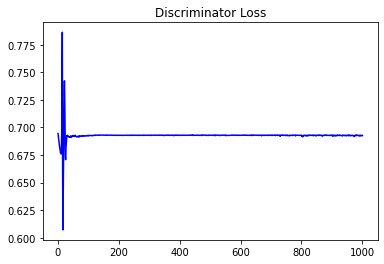

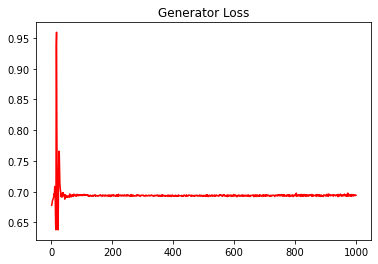

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,0,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.015555729970150681


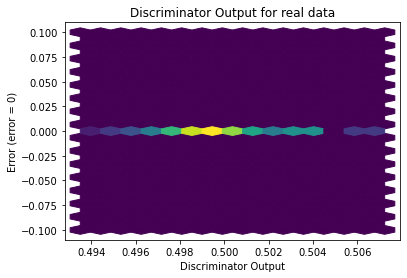

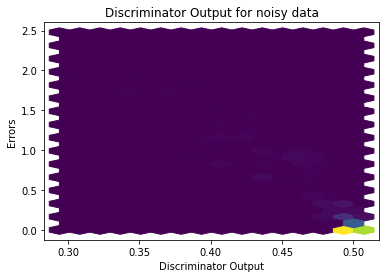

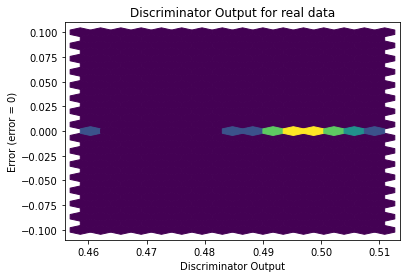

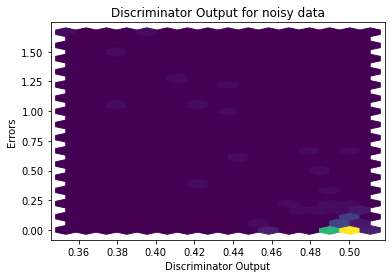

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


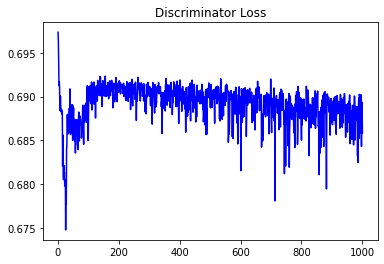

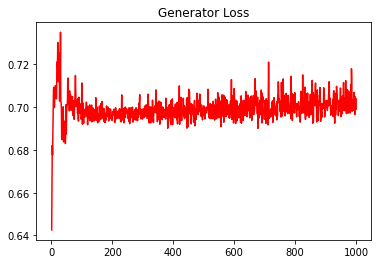

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,0,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.009122433212240684


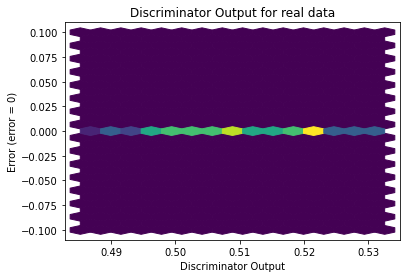

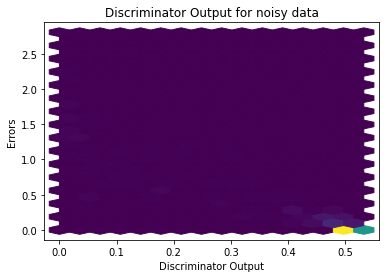

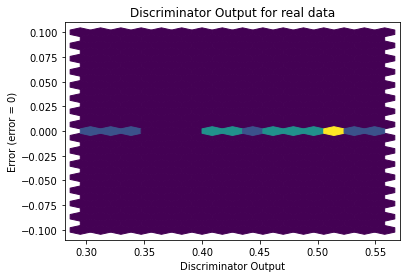

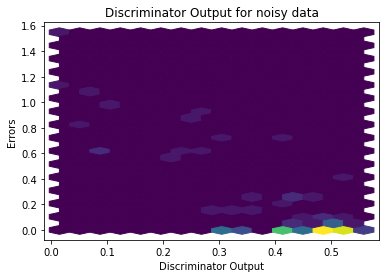

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1673]], requires_grad=True)
